In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.shape

(768, 9)

In [8]:
feature_cols =['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [9]:
#modelo de entrenamiento
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
# algoritmo
logreg = LogisticRegression(max_iter=150)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [16]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
cnf = metrics.confusion_matrix(y_test,y_pred)
cnf

array([[118,  12],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

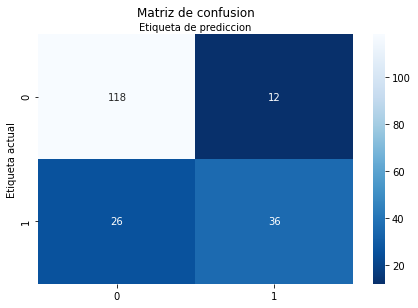

In [23]:
import numpy as np
class_name = [0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks,class_name)
plt.yticks(tick_marks,class_name)

sns.heatmap(pd.DataFrame(cnf),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion')
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')


In [24]:
print("exactitud",metrics.accuracy_score(y_test,y_pred))

exactitud 0.8020833333333334
